## About the dataset


Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset, with predefined labels, we need to build a model to be used to predict class of a new or unknown case.

The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns.

The target field, called custcat, has four possible values that correspond to the four customer groups, as follows: 1- Basic Service 2- E-Service 3- Plus Service 4- Total Service

Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

In [4]:
# from google.colab import files
# files.upload()
path = "C:/Users/micho/OneDrive/Desktop/DATABASE/GITHUB/DATASET/Telecom_data.csv"


In [5]:
df = pd.read_csv(path)

In [6]:
df.head()

,Unnamed: 0,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [7]:
df.columns

Index(['Unnamed: 0', 'region', 'tenure', 'age', 'marital', 'address', 'income',
       'ed', 'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [8]:
df = df.drop('Unnamed: 0', axis=1)

In [9]:
df

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,10,39,0,0,27.0,3,0,0.0,1,3,1
996,1,7,34,0,2,22.0,5,5,0.0,1,1,1
997,3,67,59,0,40,944.0,5,33,0.0,1,1,4
998,3,70,49,0,18,87.0,2,22,0.0,1,1,3


In [10]:
df.isna().sum()

region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


In [12]:
df.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


In [13]:
df['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

281 Plus Service, 266 Basic-service, 236 Total Service, and 217 E-Service customers

array([[<Axes: title={'center': 'income'}>]], dtype=object)

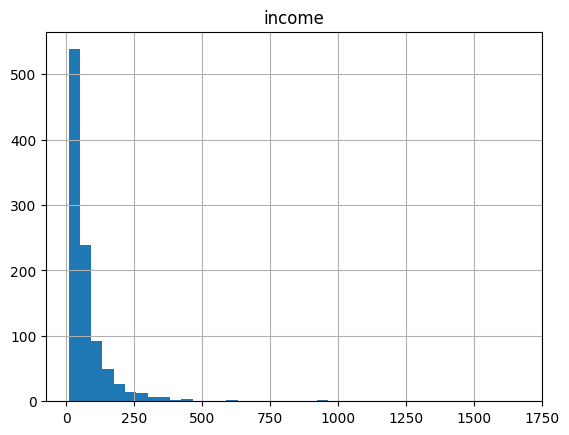

In [14]:
df.hist(column='income', bins=40)

In [15]:
X, y =df.iloc[:,:-1], df.iloc[:,-1]
X[0:3]

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
0,2,13,44,1,9,64.0,4,5,0.0,0,2
1,3,11,33,1,7,136.0,5,5,0.0,0,6
2,3,68,52,1,24,116.0,1,29,0.0,1,2


In [16]:
y[0:3]

0    1
1    4
2    3
Name: custcat, dtype: int64

Normalize Data


Data Standardization gives the data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on the distance of data points:

In [17]:
X = preprocessing.StandardScaler().fit(X).transform(X).astype(float)
X[0:2]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158]])

Train Test Split


Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of our model overfitting.

It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split. Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that has been used to train the model. It is more realistic for the real world problems.
Train Test Split

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


Classification(K nearest neighbor model)


Building and training the model for the classification using the Classifier by implementing the k-nearest neighbors vote.




Let's train the algorithm with k=4 for now:

In [19]:
from sklearn.neighbors import KNeighborsClassifier
k = 4
#Train Model and Predict
neigh = KNeighborsClassifier(n_neighbors = k)
neigh.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=4)

Predicting
We can use the model to make predictions on the test set:

In [20]:
yhat = neigh.predict(X_test)
yhat

array([1, 1, 3, 2, 4, 3, 3, 2, 2, 4, 1, 4, 2, 1, 3, 1, 3, 4, 3, 4, 3, 3,
       3, 1, 1, 3, 1, 1, 1, 2, 1, 1, 4, 4, 3, 2, 3, 1, 2, 3, 1, 4, 2, 1,
       2, 1, 4, 1, 4, 4, 2, 1, 2, 3, 2, 3, 3, 3, 4, 1, 1, 4, 2, 3, 3, 1,
       1, 2, 2, 1, 1, 3, 4, 3, 2, 1, 4, 2, 2, 3, 3, 1, 2, 4, 4, 2, 3, 4,
       1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 3, 1, 1, 4, 1, 1, 1, 4, 2, 2, 2, 2,
       1, 3, 2, 4, 1, 2, 1, 1, 2, 3, 4, 2, 2, 3, 1, 1, 2, 3, 1, 3, 3, 1,
       1, 4, 2, 2, 2, 1, 1, 3, 1, 1, 4, 1, 1, 2, 1, 3, 2, 2, 1, 2, 2, 3,
       2, 3, 3, 3, 3, 2, 3, 1, 1, 1, 3, 4, 1, 1, 3, 1, 3, 3, 1, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 4, 4, 3, 1, 1, 3, 3, 4, 1, 4,
       3, 3])

In [21]:
Yhat_train = neigh.predict(X_train)
Yhat_train[0:50]


array([3, 3, 3, 1, 2, 1, 3, 1, 1, 3, 1, 1, 2, 3, 4, 3, 1, 3, 1, 1, 4, 3,
       4, 2, 4, 3, 1, 1, 4, 3, 2, 3, 2, 2, 2, 4, 1, 2, 3, 1, 3, 4, 4, 4,
       3, 3, 2, 1, 2, 4])

Model's Accuracy Evaluation


In multilabel classification, accuracy classification score is a function that computes subset accuracy. This function is equal to the jaccard_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.



In [23]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train,Yhat_train))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))



Train set Accuracy:  0.5475
Test set Accuracy:  0.32


Experimenting with K value of 6

In [24]:
k = 6
neigh6 = KNeighborsClassifier(n_neighbors = k)
neigh6.fit(X_train,y_train)



KNeighborsClassifier(n_neighbors=6)

In [25]:
yhat6 = neigh6.predict(X_test)
yhat6

array([3, 3, 3, 4, 4, 3, 3, 4, 2, 4, 1, 4, 3, 1, 3, 1, 4, 4, 3, 2, 3, 2,
       1, 1, 1, 3, 2, 1, 1, 2, 3, 1, 4, 2, 1, 2, 3, 1, 2, 2, 3, 2, 1, 1,
       4, 1, 2, 1, 4, 4, 2, 1, 2, 2, 2, 3, 3, 3, 1, 4, 1, 4, 2, 1, 3, 3,
       1, 3, 2, 1, 1, 3, 4, 3, 2, 1, 1, 1, 2, 3, 3, 4, 2, 4, 2, 1, 3, 3,
       1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 3, 2, 4, 1, 1, 1, 4, 2, 4, 2, 2,
       1, 3, 2, 4, 1, 2, 1, 3, 2, 3, 4, 1, 2, 3, 1, 1, 2, 3, 1, 3, 3, 1,
       1, 4, 2, 2, 4, 1, 1, 2, 4, 3, 4, 1, 1, 2, 1, 1, 2, 2, 1, 2, 4, 2,
       2, 3, 3, 3, 3, 1, 2, 1, 2, 1, 1, 4, 1, 1, 3, 1, 3, 3, 3, 2, 2, 2,
       1, 4, 1, 1, 1, 2, 1, 3, 3, 1, 1, 1, 4, 1, 3, 1, 3, 3, 3, 4, 1, 3,
       1, 3])

In [26]:
Yhat6_train = neigh6.predict(X_train)
Yhat6_train[0:50]

array([4, 3, 3, 1, 1, 1, 3, 1, 1, 3, 3, 3, 2, 3, 3, 3, 1, 2, 3, 1, 4, 3,
       2, 2, 4, 1, 1, 1, 4, 3, 4, 3, 2, 2, 2, 4, 1, 2, 3, 4, 3, 4, 4, 1,
       3, 3, 2, 1, 3, 2])

In [27]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, Yhat6_train))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

Train set Accuracy:  0.51625
Test set Accuracy:  0.31


In [28]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):

    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)


    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

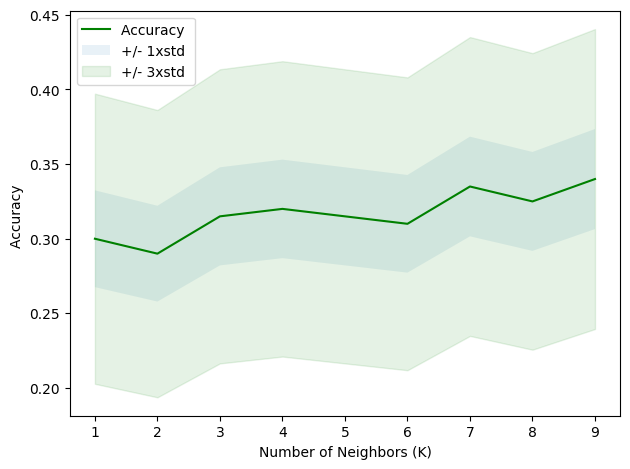

In [29]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [30]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.34 with k= 9


Using the grid search to find the optimal value of k for K-Nearest Neighbors (KNN) classification or regression. Grid search is a common technique for hyperparameter tuning, and it works well to help get the precise value of K for accuarate prediction and classifiaction.

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
param_grid = {'n_neighbors': list(range(1, 10))}  # Testing k from 1 to 30
KNN = KNeighborsClassifier()
grid_search = GridSearchCV(KNN, param_grid, cv=5, scoring='accuracy')

In [33]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='accuracy')

In [34]:
grid_test = grid_search.predict(X_test)
grid_test

array([3, 3, 3, 2, 4, 3, 3, 4, 3, 4, 1, 4, 3, 2, 3, 1, 4, 4, 3, 2, 3, 2,
       1, 1, 1, 3, 2, 1, 1, 1, 3, 1, 4, 2, 1, 2, 3, 1, 2, 3, 3, 4, 1, 1,
       4, 1, 3, 1, 4, 4, 2, 1, 2, 1, 2, 2, 4, 3, 1, 4, 1, 4, 2, 1, 3, 3,
       1, 3, 3, 1, 1, 3, 4, 3, 1, 1, 4, 1, 4, 3, 3, 1, 2, 4, 4, 1, 3, 3,
       1, 1, 1, 2, 1, 1, 1, 1, 2, 3, 1, 3, 3, 4, 3, 1, 1, 4, 2, 4, 2, 4,
       1, 3, 2, 4, 1, 2, 1, 3, 2, 3, 4, 3, 2, 3, 1, 1, 4, 3, 1, 3, 3, 1,
       1, 4, 2, 2, 4, 1, 1, 2, 1, 4, 4, 3, 1, 2, 1, 1, 2, 2, 1, 2, 4, 2,
       2, 3, 3, 3, 3, 1, 4, 1, 2, 1, 1, 4, 1, 1, 3, 1, 2, 4, 3, 2, 4, 2,
       3, 4, 1, 1, 1, 2, 1, 3, 3, 1, 1, 1, 4, 1, 3, 1, 3, 3, 3, 4, 1, 3,
       2, 3])

In [35]:
grid_train = grid_search.predict(X_train)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, grid_train))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, grid_test))


Train set Accuracy:  0.5125
Test set Accuracy:  0.335


In [36]:
best_knn = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'n_neighbors': 7}
Best cross-validation score: 0.35625


In [37]:
param_grid = {'n_neighbors': list(range(1, 31))}  # Testing k from 1 to 30
KNN = KNeighborsClassifier()
grid_search = GridSearchCV(KNN, param_grid, cv=5, scoring='accuracy')

In [38]:
grid_search.fit(X_train, y_train)
grid_test = grid_search.predict(X_test)
grid_test

array([3, 1, 4, 2, 4, 3, 3, 1, 3, 2, 1, 4, 3, 2, 2, 1, 4, 4, 3, 2, 3, 4,
       1, 4, 4, 3, 2, 1, 1, 1, 3, 1, 4, 2, 1, 2, 3, 3, 2, 4, 3, 4, 3, 1,
       4, 4, 1, 1, 4, 4, 1, 1, 2, 1, 3, 3, 4, 1, 1, 4, 1, 4, 2, 1, 3, 3,
       1, 3, 3, 1, 1, 3, 2, 3, 1, 1, 2, 3, 2, 2, 3, 1, 3, 1, 4, 3, 3, 3,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 3, 2, 3, 1, 1, 4, 2, 2, 2, 1,
       1, 3, 2, 2, 1, 2, 1, 1, 1, 1, 4, 3, 2, 3, 1, 1, 4, 3, 3, 2, 3, 1,
       1, 4, 3, 2, 2, 1, 3, 3, 4, 4, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 4, 2,
       4, 3, 3, 1, 3, 3, 3, 1, 2, 1, 3, 4, 1, 1, 3, 1, 3, 3, 1, 2, 2, 2,
       3, 4, 1, 4, 1, 3, 1, 3, 3, 2, 3, 1, 2, 1, 3, 3, 4, 3, 3, 4, 1, 3,
       1, 3])

In [39]:
grid_train = grid_search.predict(X_train)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, grid_train))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, grid_test))


Train set Accuracy:  0.45125
Test set Accuracy:  0.345


In [40]:
best_knn = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'n_neighbors': 19}
Best cross-validation score: 0.37875


Model Performance:

Train set accuracy (0.45125) and test set accuracy (0.345) are both relatively low, indicating poor overall performance.
The significant difference between train and test accuracy suggests overfitting, despite using cross-validation.


Best K Value:

The grid search found that k=19 gave the best cross-validation score of 0.37875.
This relatively high k value suggests that the model benefits from considering more neighbors, possibly due to noise in the data or complex decision boundaries.


The best cross-validation score (0.37875) is lower than the train accuracy but higher than the test accuracy, indicating issues with generalization.


As long as the goal is to improve both the model's performance and its ability to generalize. It's an iterative process, so I may need to try the following:
try Other Algorithms, consider stratified k-fold if dealing with imbalanced classes, evaluate with Multiple Metrics.

Author:
[Jolayemi Babatunde](linkedin.com/in/babatunde-jolayemi-a05312275)